In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
def plot_prior_and_posterior(r, s, n, k):
    p = np.arange(0, 1, 0.01)
    prior = stats.beta.pdf(p, r, s)
    posterior = stats.beta.pdf(p, r+k, s+n-k)
    plt.plot(p, prior, lw=2, color='gold', label = 'Prior: beta (r, s)')
    plt.plot(p, posterior, lw=2, color='darkblue', label = 'Posterior: beta(r+k, s+n-k)')
    plt.legend(bbox_to_anchor=(1.6, 1.02))
    ymax = max(max(prior), max(posterior))
    plt.ylim(-0.3, ymax+0.1)
    plt.xlim(0, 1)
    plt.scatter(r/(r+s), -0.1, marker='^', s=40, color='gold')
    plt.scatter((r+k)/(r+s+n), -0.1, marker='^', s=40, color='darkblue')
    plt.scatter(k/n, -0.02, s=30, color='red')
    plt.xlabel('$p$')
    plt.title('Prior, and Posterior Given $S_n = k$ (red dot at $k/n$)');

## Updating and Prediction ##

Let $X$ be a random variable with a beta density. Given $X=p$, toss a $p$-coin $n$ times and observe the number of heads. Based on the number of heads, we are going to:
- Identify the posterior distribution of $X$ 
- Predict the chance of heads on the $(n+1)$st toss

### Beta Prior ###
For positive integers $r$ and $s$, we derived the beta $(r, s)$ density

$$
f(x) = \frac{(r+s-1)!}{(r-1)!(s-1)!} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1
$$

by studying order statistics of i.i.d. uniform $(0, 1)$ random variables. The beta family can be extended to include parameters $r$ and $s$ that are positive but not integers. This is possible because of two facts that you have observed in exercises:
- The Gamma function is a continuous extension of the factorial function.
- If $r$ is a positive integer then $\Gamma(r) = (r-1)!$.

For fixed positive numbers $r$ and $s$, not necessarily integers, the beta $(r, s)$ density is defined by

$$
f(x) = 
\frac{\Gamma(r+s)}{\Gamma(r)\Gamma(s)} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1 
$$

We will not prove that this function integrates to 1, but it is true and should be believable because we have seen it to be true for integer values of the parameters.

To simplify notation, we will denote the constant in the beta $(r, s)$ density by $C(r, s)$.

$$
C(r, s) ~ = ~ \frac{\Gamma(r+s)}{\Gamma(r)\Gamma(s)}
$$

so that the beta $(r, s)$ density is given by $C(r, s)x^{r-1}(1-x)^{s-1}$ for $x \in (0, 1)$.

Beta distributions are often used to model random proportions. In the previous chapter you saw the beta $(1, 1)$ distribution, better known as the uniform, used in this way to model a randomly picked coin.

You also saw that given that we know the value of $p$ for the coin we are tossing, the tosses are independent, but when we don't know $p$ then the tosses are no longer independent. For example, knowledge of how the first toss came out tells us something about $p$, which in turn affects the probabilities of how the second toss might come out. 

We will now extend these results by starting with a general beta $(r, s)$ prior for the chance that the coin lands heads.

### The Experiment ###
Let $X$ have the beta $(r, s)$ distribution. This is the prior distribution of $X$. Denote the prior density by $f_X$. Then

$$
f_X(p) ~ = ~ C(r, s)p^{r-1}(1-p)^{s-1}, ~~~~ 0 < p < 1
$$

Given $X = p$, let $I_1, I_2, \ldots$ be i.i.d. Bernoulli $(p)$. That is, given $X = p$, toss a $p$-coin repeatedly and record the results as $I_1, I_2, \ldots$.

Let $S_n = I_1 + I_2 + \cdots + I_n$ be the number of heads in the first $n$ tosses. Then the conditional distribution of $S_n$ given $X = p$ is binomial $(n, p)$. It gives you the likelihood of the observed number of heads given a value of $p$.

In [3]:
# VIDEO: Conjugate Priors
from IPython.display import YouTubeVideo

YouTubeVideo('NBySphqHwvw')

### Updating: The Posterior Distribution of $X$ Given $S_n$ ###
Before running the experiment, our prior opinion is that $X$ has the beta $(r, s)$ distribution. To update that opinion after we have tossed $n$ times and seen the number of heads, we have to find the posterior distribution of $X$ given $S_n = k$.

As we have seen, the posterior density is proportional to the prior times the likelihood. For $0 < p < 1$,

$$
\begin{align*}
f_{X \vert S_n=k} (p) ~ &\propto ~ {C(r, s) p^{r-1}(1-p)^{s-1} \cdot \binom{n}{k} p^k (1-p)^{n-k}}\\ \\
&\propto ~ p^{r+k-1}(1-p)^{s + (n-k) - 1} 
\end{align*}
$$

because $C(r, s)$ and $\binom{n}{k}$ do not involve $p$.

You can see at once that this is the beta $(r+k, s+n-k)$ density:

$$
f_{X \mid S_n = k} (p) ~ = ~ C(r+k, s+n-k) p^{r+k-1}(1-p)^{s + n - k - 1}, ~~~ 0 < p < 1
$$

This beta posterior density is easy to remember. Start with the prior; update the first parameter by adding the observed number of heads; update the second parameter by adding the observed number of tails.

### Conjugate Prior ###
The prior distribution of the probability of heads is from the beta family. The posterior distribution of the probability of heads, given the number of heads, is another beta density. The beta prior and binomial likelihood combine to result in a beta posterior. The beta family is therefore called a *family of conjugate priors* for the binomial distribution: the posterior is another member of the same family as the prior.

### MAP Estimate: Posterior Mode ###
The MAP estimate of the chance of heads is the mode of the posterior distribution. If $r$ and $s$ are both greater than 1 then the mode of the posterior distribution of $X$ is

$$
\frac{r+k-1}{r+s+n-2}
$$

In [4]:
# VIDEO: Prediction

YouTubeVideo('h7FmqsTfSKY')

### Posterior Mean ###
The posterior mean of $X$ given $S_n = k$ is the expectation of the beta posterior distribution, which for large $n$ is not far from the mode:

$$
E(X \mid S_n = k) ~ = ~ \frac{r+k}{r+s+n} 
$$

Let's examine this result in an example. Suppose the prior distribution of $X$ is beta $(5, 3)$, and thus the prior mean is $E(X) = 5/8 = 0.625$.  Now suppose we are given that $S_{100} = 70$. Then the posterior distribution of $X$ given $S_{100} = 70$ is beta $(75, 33)$ with mean $75/108 = 0.694$.

The graph below shows the two densities along with the corresponding means. The red dot is at the observed proportion of heads. 

Run the cell again, keeping $r = 5$ and $s = 3$ but changing $n$ to 10 and $k$ to 7, then again changing $n$ to 1000 and $k$ to $700$. The observed proportion is 0.7 in all cases. Notice how increasing the sample size concentrates the prior around 0.7. We will soon see the reason for this. 

Also try other values of the parameters as well as $n$ and $k$, including values where the observed proportion is quite different from the mean of the prior.

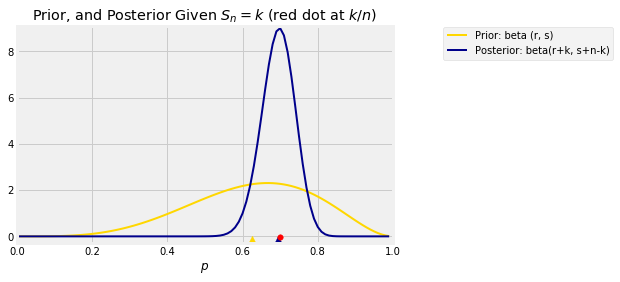

In [5]:
# Prior: beta (r, s)
# Given: S_n = k

# Change the values
r = 5
s = 3
n = 100
k = 70

# Leave this line alone
plot_prior_and_posterior(r, s, n, k)

You can see how the data dominate the prior. The posterior distribution is concentrated around the posterior mean. The prior mean was 0.625, but given that we got 70 heads in 100 tosses, the posterior mean is 0.694 which is very close to the observerd proportion 0.7. 

The formula for the posterior mean shows that for large $n$ it is likely to be close to the observed proportion of heads. Given $S_n = k$, the posterior mean is

$$
E(X \mid S_n = k) ~ = ~ \frac{r + k}{r + s + n}
$$

Therefore as a random variable, the posterior mean is

$$
E(X \mid S_n) ~ = ~ \frac{r + S_n}{r + s + n}
$$

As the number of tosses $n$ gets large, the number of heads $S_n$ is likely to get large too. So the value of $S_n$ is likely to dominate the numerator, and $n$ will dominate the denominator, because $r$ and $s$ are constants. Thus for large $n$, the posterior mean is likely to be close to $S_n/n$.

### Prediction: The Distribution of $S_{n+1}$ Given $S_n$ ###
As you saw in the previous chapter, the chance that a random coin lands heads is the expected value of its random probability of heads. Apply this to our current setting to see that

$$
P(S_1 = 1) ~ = ~ P(\text{first toss is a head}) ~ = ~ E(X) ~ = ~ \frac{r}{r+s}
$$

Now suppose that we have the results of the first $n$ tosses, and that $k$ of those tosses were heads. Given that $S_n = k$, the possible values of $S_{n+1}$ are $k$ and $k+1$. We can now use our updated distribution of $X$ and the same reasoning as above to see that

$$
P(S_{n+1} = k+1 \mid S_n = k) ~ = ~ P(\text{toss } n+1 \text{ is a head} \mid S_n = k)
~ = ~ E(X \mid S_n = k) ~ = ~ \frac{r+k}{r + s + n}
$$

We can work out $P(S_{n+1} = k \mid S_n = k)$ by the complement rule. We now have a transition function. Given that $S_n = k$, the conditional distribution of $S_{n+1}$ is given by

$$
S_{n+1} =
\begin{cases} 
k ~~~~~~~~ \text{ with probability } (s + n - k)/(r + s + n) \\
k+1 ~~ \text{ with probability } (r+k)/(r + s + n)
\end{cases}
$$

In other words, given the results of the first $n$ tosses, the chance that Toss $n+1$ is a tail is proportional to $s$ plus the number of failures. The chance that Toss $n+1$ is a head is proportional to $r$ plus the number of successes.

You can think of the sequence $\{ S_n: n \ge 1 \}$ as a Markov chain, but keep in mind that the transition probabilities are not time-homogenous – the formulas involve $n$. 